In [1]:
# load data
import pandas as pd
import openpyxl
df = pd.read_excel(r"C:\Users\Duhita\Downloads\online+retail\Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [2]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [3]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [4]:
na_counts = df.isna().sum()
na_counts

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We definately dont want nulls in the customer id, becasue what will we do of the data where the basic id is non existent

In [5]:
df['CustomerID']

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [6]:
df_cleaned = df.dropna(subset=['CustomerID'])

In [7]:
df_cleaned = df_cleaned[df_cleaned['Quantity']> 0]


In [8]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]


In [9]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
df_cleaned.shape

(397884, 8)

In [11]:
df.shape

(541909, 8)

In [12]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [13]:
df_cleaned['InvoiceDate'].isnull().sum()

np.int64(0)

Top Countries by Quantity Sold

In [14]:
country_sales = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
country_sales

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Australia           83901
Sweden              36083
Switzerland         30082
Spain               27940
Japan               26016
Name: Quantity, dtype: int64

In [15]:
df_cleaned['TotalPrice']  = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
country_revenue = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_revenue

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64

In [16]:
# df_cleaned['InvoiceDate'].dtype
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate']).dt.date
df_cleaned['InvoiceDate'].head()
df_cleaned['InvoiceDate'].dtype

dtype('O')


### This is the Part of calculating the RFM metrics i.e creating three new columns in our df_cleaned for  Recency, Frequency and Monetary
#### Recency -  the number of days since the last purchase is calculated by subraciting each customers last invocie date from the refrence date which is the laetst date!
#### Frequency: Count how many times each customer made a purchase.
#### Monetary: Calculate the total amount spent by each customer.

In [17]:
refrence_date = df_cleaned['InvoiceDate'].max()

In [18]:
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (refrence_date - x.max()).days, #Recency
    'InvoiceNo': 'nunique',                                   #frequency
    'TotalPrice': 'sum'                                      #Monetary
    
})

# renaming columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40


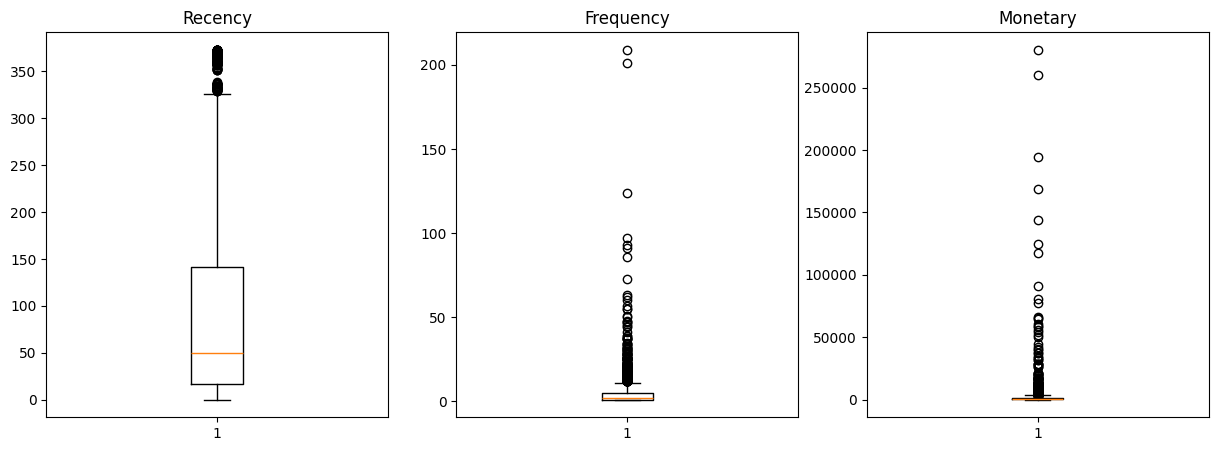

In [19]:
# Let's plot box plots for the RFM metrics to visualize the outliers

import matplotlib.pyplot as plt

# Create box plots for Recency, Frequency, and Monetary
plt.figure(figsize=(15, 5))

# Box plot for Recency
plt.subplot(1, 3, 1)
plt.boxplot(rfm['Recency'])
plt.title('Recency')

# Box plot for Frequency
plt.subplot(1, 3, 2)
plt.boxplot(rfm['Frequency'])
plt.title('Frequency')

# Box plot for Monetary
plt.subplot(1, 3, 3)
plt.boxplot(rfm['Monetary'])
plt.title('Monetary')

# Display the box plots
plt.show()

In [20]:
# assigning RFM scores(1 to 5) for each metric (Recency, Frequency, Monetary)
# we assign 5 for the best customers(most recent, most fequent, highest spenders and 1 for the least engaged.
# Recency: lower value means more recent, so invert the bins
rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')

# Frequency: Higher value means more frequent, so no need to invert
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

rfm['M_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')

rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,2,7,4310.00,5,5,5,555
12348.0,75,4,1797.24,2,4,4,244
12349.0,18,1,1757.55,4,1,4,414
12350.0,310,1,334.40,1,1,2,112


In [21]:
# Count the number of customers for each RFM score (R, F, M scores separately)

# Count for R score
r_score_counts = rfm['R_score'].value_counts()

# Count for F score
f_score_counts = rfm['F_score'].value_counts()

# Count for M score
m_score_counts = rfm['M_score'].value_counts()

rfm_score_counts = rfm['RFM_score'].value_counts().sum

# Display the counts for R, F, and M scores
r_score_counts, f_score_counts, m_score_counts, rfm_score_counts


(R_score
 4    880
 5    868
 2    866
 3    863
 1    861
 Name: count, dtype: int64,
 F_score
 1    868
 3    868
 5    868
 2    867
 4    867
 Name: count, dtype: int64,
 M_score
 1    868
 3    868
 5    868
 2    867
 4    867
 Name: count, dtype: int64,
 <bound method Series.sum of RFM_score
 555    348
 111    182
 455    175
 121    153
 112    127
       ... 
 152      1
 552      1
 452      1
 551      1
 251      1
 Name: count, Length: 117, dtype: int64>)

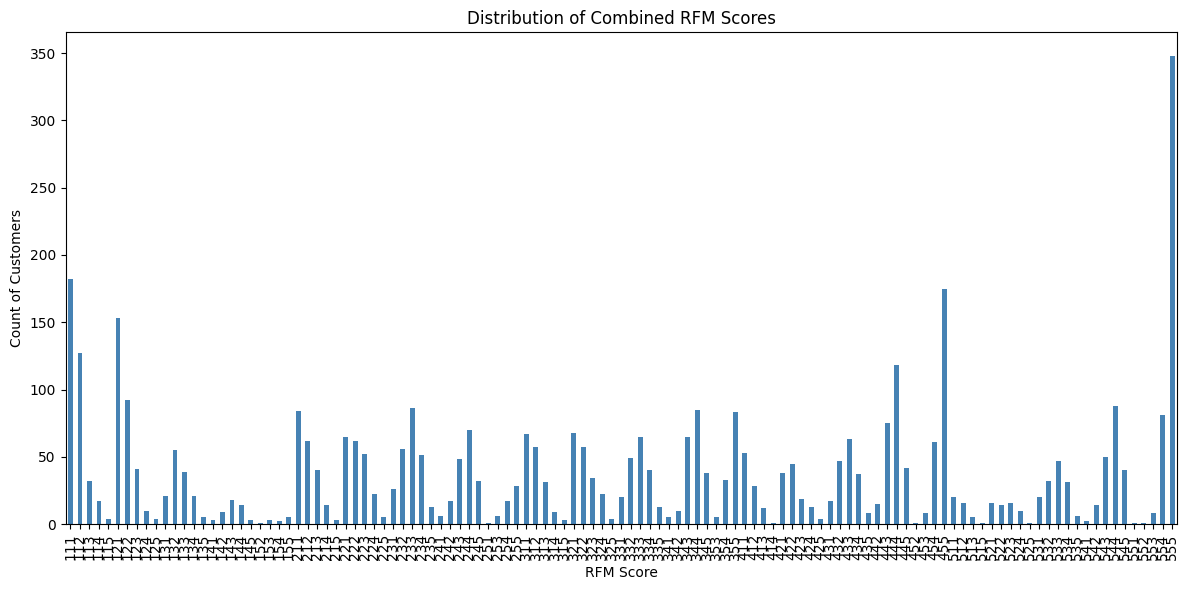

In [22]:
# Count the number of customers for each combined RFM score (RFM_score)
rfm_score_counts = rfm['RFM_score'].value_counts()

# Plot the distribution of RFM scores
plt.figure(figsize=(12, 6))
rfm_score_counts.sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribution of Combined RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count of Customers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


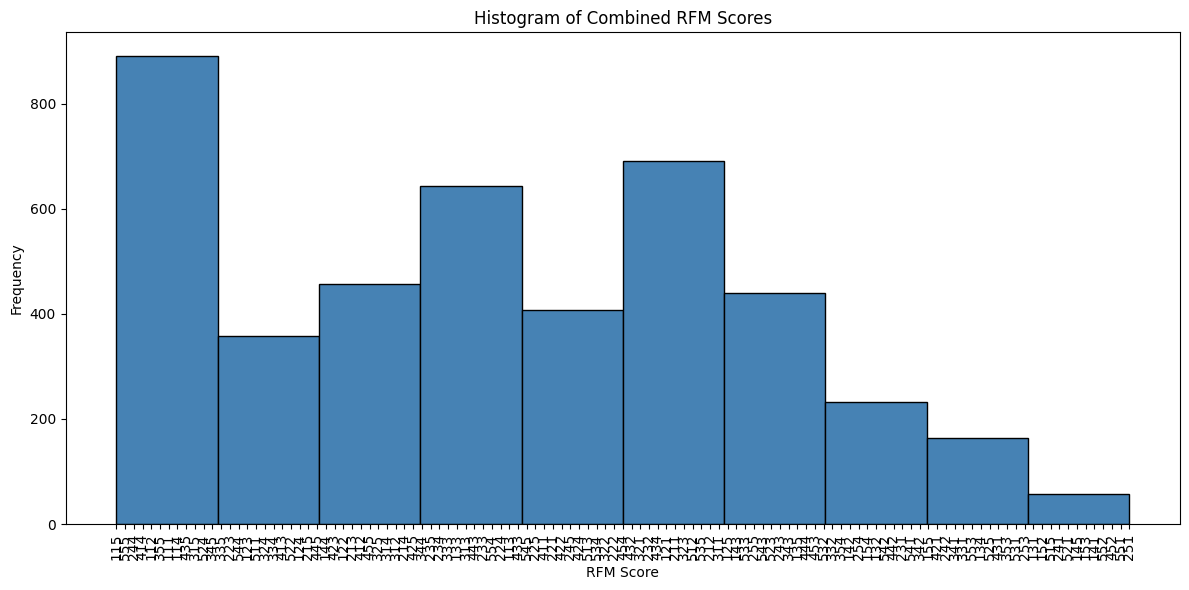

In [23]:
# Plotting a histogram of the RFM scores to show the distribution
plt.figure(figsize=(12, 6))
plt.hist(rfm['RFM_score'], bins=10, color='steelblue', edgecolor='black')
plt.title('Histogram of Combined RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Let's do Customer Segmentation based on their RFM scores
Here's how I'll categorize the customers into segments based on the RFM scores:

Customer Segments:
Champions: RFM = 555 (High Recency, Frequency, and Monetary)
Loyal Customers: High Frequency (F ≥ 4)
Potential Loyalists: High Recency (R ≥ 4) and moderate Frequency and Monetary
New Customers: High Recency (R = 5), but low Frequency and Monetary
At Risk: Low Recency (R ≤ 2) but moderate to high Frequency and Monetary
Hibernating: Low RFM across the board (R, F, M ≤ 2)

In [28]:
# lets create a function to segment based on RFM score
def rfm_segment(row):
    if row['RFM_score'] == '555':
        return 'Champions'
    elif row['RFM_score'].startswith('5'):
        return 'Loyal Customers'
    elif row['RFM_score'].startswith('4'):
        return 'Potential Loyalists'
    elif row['RFM_score'].startswith('3'):
        return 'Promising'
    elif row['RFM_score'].startswith('2'):
        return 'Need Attention'
    elif row['RFM_score'].startswith('1'):
        return 'At Risk'
    else:
        return 'Hibernating'

# let's apply the function to create a 'Segment' column in the RFM dataframe

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm.head()


AttributeError: 'DataFrame' object has no attribute 'column'

### Next Steps:
Analyze the Segments:
How many customers fall into each segment?
What is the average Monetary value for each segment?    
Visualize the Segments:
You can create visualizations like bar charts to see the distribution of customers across different segments.

In [25]:
# lets fo segment counts analyze the distribution of customers in each segemnt!
segment_counts = rfm['Segment'].value_counts()
segment_counts.sort_values(ascending=True, inplace=True)
segment_counts

Segment
Champions              348
Loyal Customers        520
At Risk                861
Promising              863
Need Attention         866
Potential Loyalists    880
Name: count, dtype: int64

In [29]:
output_file_path = r'C:\Users\Duhita\OneDrive\Desktop\rfm_analysis\rfm_segmentation_test1.xlsx'
rfm.to_excel(output_file_path, index=True)



### Now that the RFM segmentation is working and you've got your customer segments, here are the possible next steps:

### 1. **Analyze Segments**:
   - **Examine Segment Characteristics**: Analyze the behavior of each segment. For example:
     - What is the average spending for "Champions" vs. "At Risk"?
     - How many customers fall into each segment?
   - **Customer Lifetime Value (CLV)**: Calculate CLV based on segment behavior, focusing on high-value customers like "Champions" and "Loyal Customers."
   - **Churn Analysis**: Focus on the "At Risk" or "Hibernating" segments to prevent churn.

### 2. **Visualize Segments**:
   - Create charts to visualize customer distribution by segment.
   - Visualize the monetary contribution from each segment.

### 3. **Tailor Marketing Strategies**:
   - **Champions**: Provide exclusive offers and loyalty rewards.
   - **Loyal Customers**: Keep them engaged with special promotions.
   - **At Risk**: Send re-engagement emails or discounts to bring them back.

### 4. **Personalized Campaigns**:
   Use the segmentation to drive personalized marketing campaigns for each group. For example:
   - Target "Potential Loyalists" with incentives to become "Loyal Customers."

